In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn




In [32]:
X_train = pd.read_csv('./dataset/hard_test/train.csv')
X_train.drop(columns=['Unnamed: 0'], inplace=True)
y_train = X_train.y
X_train = X_train.values[:,0:-1]
X_test = pd.read_csv('./dataset/hard_test/test.csv')
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test = X_test.y
X_test = X_test.values[:,0:-1]

In [10]:
y_train

0        1
1        0
2        0
3        0
4        0
        ..
10383    0
10384    1
10385    0
10386    0
10387    0
Name: y, Length: 10388, dtype: int64

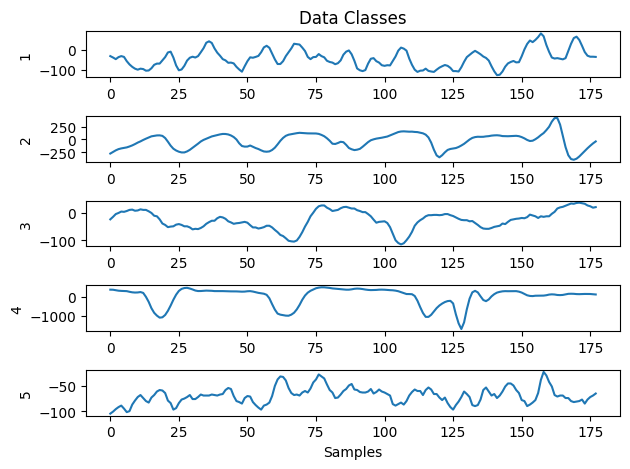

In [11]:
plt.subplot(511)
plt.plot(X_train[1,:])
plt.title('Data Classes')
plt.ylabel('1')

plt.subplot(512)
plt.plot(X_train[7,:])
plt.ylabel('2')  # Label for the Y-axis

plt.subplot(513)
plt.plot(X_train[12,:])
plt.ylabel('3')  # Label for the Y-axis

plt.subplot(514)
plt.plot(X_train[0,:])
plt.ylabel('4')  # Label for the Y-axis

plt.subplot(515)
plt.plot(X_train[2,:])
plt.xlabel('Samples')  # Label for the X-axis
plt.ylabel('5')  # Label for the Y-axis

plt.tight_layout()  # Adjusts the layout so labels don't overlap
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

def evaluate_classification_metrics(y_true, y_pred, y_pred_prob):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    
    # Print metrics
    print(f'Accuracy: {accuracy * 100:.2f} %')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC-AUC: {roc_auc:.2f}')
    print(f'Cohen\'s Kappa: {kappa:.2f}')
    
    # Return metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'kappa': kappa
    }

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
# import wandb
# from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbEvalCallback

# Initialize Weights & Biases project
# wandb.init(project="EEG_CNN_Classification", entity="namangarg2025")

def InceptionNucleus(input_layer, filters):
    branches = []
    for f in filters:
        x = Conv1D(filters=32, kernel_size=f, padding='same', activation='relu')(input_layer)
        branches.append(x)
    output = tf.keras.layers.concatenate(branches, axis=-1)
    return output

def create_eeg_cnn(input_shape=(178, 1), num_classes=2):
    inputs = Input(shape=input_shape)

    # Initial 1D Convolutional Layers with Inception Nucleus
    x = InceptionNucleus(inputs, filters=[4, 8, 12])

    # Reshape for 2D Convolutions
    x = Reshape((x.shape[1], x.shape[2], 1))(x) # (178, 96, 1) for example

    # 2D Convolutional Layers
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten after 2D Convolutions
    x = Flatten()(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_eeg_cnn(input_shape=(178, 1), num_classes=2)

# Print model summary
model.summary()

# Fit the model with W&B callback


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 178, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 178, 32)   │        160 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 178, 32)   │        288 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 178, 32)   │        416 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 178, 96)   │          0 │ conv1d_9[0][0],   │
│ (Concatenate)       │                   │            │ conv1d_10[0][0],  │
│                     │                   │            │ conv1d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 178, 96,   │          0 │ concatenate_3[0]… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 178, 96,   │        640 │ reshape_3[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 178, 96,   │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 89, 48,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 273408)    │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 2)         │    546,818 │ flatten_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 548,578 (2.09 MB)

 Trainable params: 548,450 (2.09 MB)

 Non-trainable params: 128 (512.00 B)

In [35]:
model = create_eeg_cnn(input_shape=(178, 1), num_classes=2)

In [36]:
X_train.shape

(10388, 178)

In [37]:
y_train.shape


(10388,)

In [18]:
# callbacks = [
#     WandbMetricsLogger(),  # Logs training metrics to W&B
#     WandbModelCheckpoint(filepath="model_best.keras", save_best_only=True),  # Save the best model
#     # WandbEvalCallback(validation_data=(X_val, y_val))  # Evaluates the model on the validation set
# ]

# Train your model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, 
        #   callbacks=callbacks
        )

Epoch 1/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 64s 245ms/step - accuracy: 0.9524 - loss: 6.8467 - val_accuracy: 0.9841 - val_loss: 1.8212
Epoch 2/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 62s 239ms/step - accuracy: 0.9746 - loss: 3.2725 - val_accuracy: 0.9894 - val_loss: 1.6496
Epoch 3/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 62s 239ms/step - accuracy: 0.9752 - loss: 4.4894 - val_accuracy: 0.9851 - val_loss: 1.4856
Epoch 4/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 62s 236ms/step - accuracy: 0.9858 - loss: 1.7047 - val_accuracy: 0.9678 - val_loss: 4.3067
Epoch 5/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 64s 245ms/step - accuracy: 0.9817 - loss: 1.9712 - val_accuracy: 0.9889 - val_loss: 1.7539
Epoch 6/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 60s 231ms/step - accuracy: 0.9896 - loss: 0.9253 - val_accuracy: 0.9846 - val_loss: 2.1451
Epoch 7/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 60s 230ms/step - accuracy: 0.9868 - loss: 1.5595 - val_accuracy: 0.9913 - val_loss: 1.3204
Epoch 8/15
260/260 ━━━━━━━━━━━━━━━━━━━━ 61s 234ms/step - accuracy: 0.9917 - loss: 0

In [19]:
# Predicting the Test set results
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
# y_pred = (y_pred_probs > 0.5)
metrics_ann = evaluate_classification_metrics(y_test, y_pred, y_pred_probs[:,1])

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Accuracy: 75.09 %
Precision: 0.49
Recall: 0.71
F1 Score: 0.58
ROC-AUC: 0.78
Cohen's Kappa: 0.41


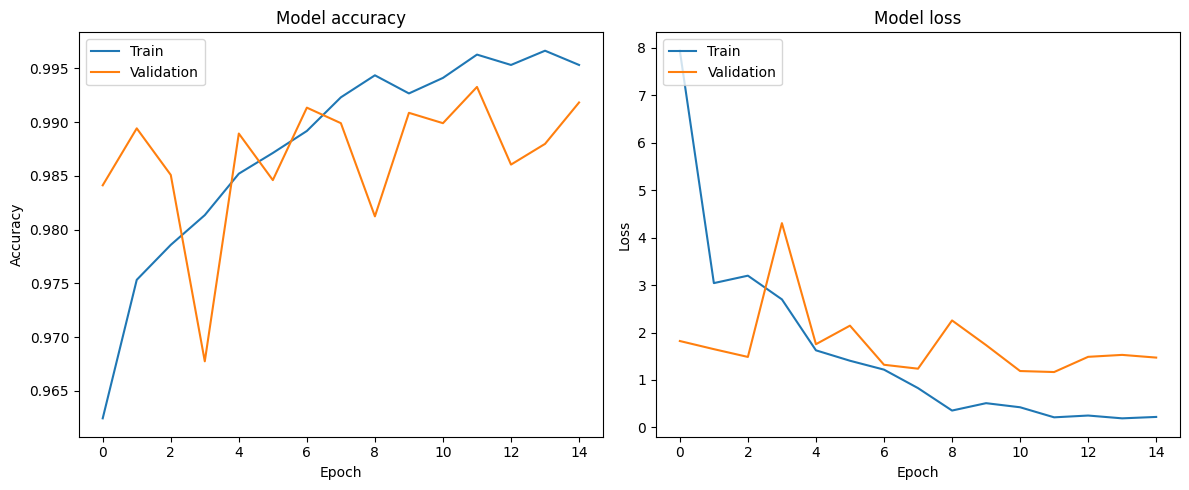

In [20]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Data Augmentation 

In [23]:
import tsaug
import numpy as np
from sklearn.utils import shuffle
import random  

def augment_data(features, labels, target_count):
    # Step 1: Count the number of data points for each class (0 and 1)
    count_0 = np.sum(labels == 0)
    count_1 = np.sum(labels == 1)

    print(f"Number of class 0: {count_0}")
    print(f"Number of class 1: {count_1}")

    # Step 2: Filter out the minority and majority class data
    class_0_data = features[labels == 0]
    class_1_data = features[labels == 1]

    augmenters = [
        tsaug.AddNoise(scale=0.025),
        tsaug.TimeWarp(n_speed_change=2),    
        tsaug.Drift(max_drift=(0.1, 0.5)),   
    ]

    # Step 3: Function to augment data row by row
    def augment_row_by_row(data, target_size):
        augmented_data = []
        while len(augmented_data) < target_size:
            for row in data:
                if len(augmented_data) >= target_size:
                    break
                augmenter = random.choice(augmenters)
                augmented_row = augmenter.augment(row[np.newaxis, :])  # Directly augment the row
                augmented_data.append(augmented_row[0])  # Append the augmented row
        return np.array(augmented_data)

    # Step 4: Augment class 0 and class 1 data row by row until they each have target_count samples
    if count_0 < target_count:
        class_0_augmented = augment_row_by_row(class_0_data, target_count - count_0)
        class_0_data_final = np.vstack((class_0_data, class_0_augmented))  
    else:
        class_0_data_final = class_0_data

    if count_1 < target_count:
        class_1_augmented = augment_row_by_row(class_1_data, target_count - count_1)
        class_1_data_final = np.vstack((class_1_data, class_1_augmented))  
    else:
        class_1_data_final = class_1_data

    # Step 5: Create new labels for the augmented data
    class_0_labels = np.zeros(len(class_0_data_final), dtype=int)
    class_1_labels = np.ones(len(class_1_data_final), dtype=int)

    # Step 6: Combine the augmented data from both classes
    new_features = np.vstack((class_0_data_final, class_1_data_final))
    new_labels = np.hstack((class_0_labels, class_1_labels))

    # Step 7: Shuffle the dataset
    X_train, y_train = shuffle(new_features, new_labels, random_state=42)

    # Final dataset information
    print(f"New dataset has {len(X_train)} samples with {np.sum(y_train == 0)} class 0 and {np.sum(y_train == 1)} class 1")

    return X_train, y_train

In [39]:
features = X_train
labels = y_train
target_count = 10000
X_train, y_train = augment_data(features, labels, target_count)

Number of class 0: 8360
Number of class 1: 2028
New dataset has 20000 samples with 10000 class 0 and 10000 class 1


In [40]:
y_train.shape

(20000,)

In [41]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (20000, 178)
y_train shape: (20000,)
X_val shape: (2078, 178)
y_val shape: (2078,)


In [42]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, 
        #   callbacks=callbacks
        )

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 253ms/step - accuracy: 0.9657 - loss: 2.5960 - val_accuracy: 0.9913 - val_loss: 0.6699
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9800 - loss: 1.0448 - val_accuracy: 0.9947 - val_loss: 0.2012
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 244ms/step - accuracy: 0.9854 - loss: 0.4431 - val_accuracy: 0.9913 - val_loss: 0.3984
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.9866 - loss: 0.3216 - val_accuracy: 0.9856 - val_loss: 0.3989
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9897 - loss: 0.2646 - val_accuracy: 0.9923 - val_loss: 0.1268
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9932 - loss: 0.1231 - val_accuracy: 0.9822 - val_loss: 0.2386
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 244ms/step - accuracy: 0.9949 - loss: 0.0880 - val_accuracy: 0.9928 - val_loss: 0.1013
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.9946 -

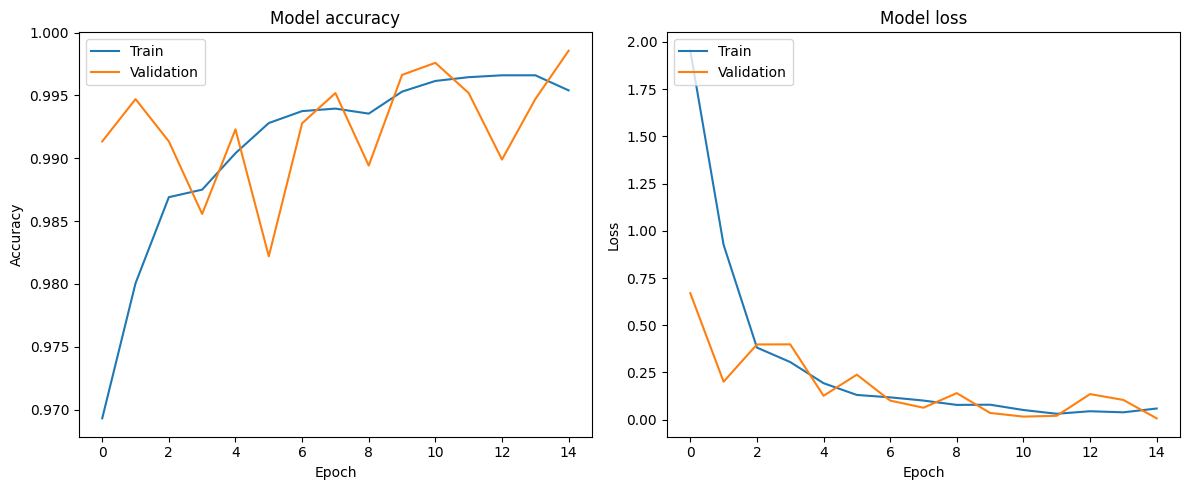

In [45]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
# Predicting the Test set results
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
# y_pred = (y_pred_probs > 0.5)
metrics_ann = evaluate_classification_metrics(y_test, y_pred, y_pred_probs[:,1])

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Accuracy: 80.58 %
Precision: 0.60
Recall: 0.61
F1 Score: 0.61
ROC-AUC: 0.84
Cohen's Kappa: 0.48


In [47]:
model.save('./models/eeg_cnn_model_augmentation.h5')